## TensorFlow 2.0 Layers

In [1]:
import tensorflow as tf

### Input Image

In [3]:
import matplotlib.pyplot as plt

#### MNIST 데이터 불러오기

In [4]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
train_x.shape

(60000, 28, 28)

In [6]:
image = train_x[0]

In [7]:
image.shape

(28, 28)

현재 이미지의 차원 ( 28, 28 ) -> ( hegit, width )

우리가 필요한 데이터의 차원 -> [ Batch_size, height, width, channel ]

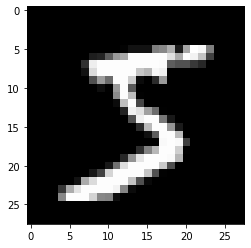

In [8]:
plt.imshow(image, 'gray')
plt.show()

image[tf.newaxis, ... , tf.newaxis] 를 통해 (28, 28) -> (1, 28, 28, 1)

In [9]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

---

## Feature Extraction

### CNN (Convolution Neural Network)
#### feature extraction (이미지의 특징을 찾고) -> classification (예측)

- filters : layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)
- kernel_size : filter(Weight)의 사이즈
- strides : 몇 개의 pixel을 skip하면서 훑고 지나갈 것인지 (사이즈에 영향)
- padding : zero padding을 만들 것인지, VAILD는 padding이 없고 , SAME은 padding이 있음 (사이즈에 영향)
- activation : Activation Function을 만들 것인지 당장 설정 안해도 Layer 층을 따로 만들 수 있음

### tf.keras.layers.Conv2D를 통해 쉽게 사용 가능

In [10]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding="SAME", activation='relu')

- filter의 개수에 따라 channel 수도 바뀜
- kernel_size - 각 필터의 사이즈 (3, 3)을 3으로 대체가능

In [13]:
tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=(1, 1), padding="SAME", activation='relu')

### Visualization

tf.keras.layers.Conv2D

- 이미지로 넣기전에 float32가 아닌 int형식이나 다른 형식일 경우 오류가 남
- tf.cast를 활용하여 float32로 변경해주어야함

In [15]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [16]:
layer = tf.keras.layers.Conv2D(3, 3, 1, padding='SAME')
layer

output에서 확인할 수 있는 것은 Conv2D Layer에서 설정한 filter값이 ouput의 channel값으로 설정되어 있는 것을 볼 수 있음
- (1, 28, 28, 1) 데이터 -> Conv2D(3 (이 값) , 3, 1, padding='SAME') -> (1, 28, 28, 3)

그리고 padding을 SAME으로 했기 때문에 zero padding이 생기지 않아 가운데 차원은 바뀌지 않음

In [18]:
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

만약 filter 값을 5, padding을 VALID로 준다면
- (1, 28, 28, 1) -> Conv2D(5, 3, 1, padding=VALID) -> (1, 26, 26, 5)

In [19]:
layer2 = tf.keras.layers.Conv2D(5, 3, 1, padding='VALID')
layer2

In [20]:
output2 = layer2(image)
output2

<tf.Tensor: shape=(1, 26, 26, 5), dtype=float32, numpy=
array([[[[  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         ...,
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ]],

        [[  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         ...,
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
    

#### 기존 이미지와 CNN을 거친 이미지 비교

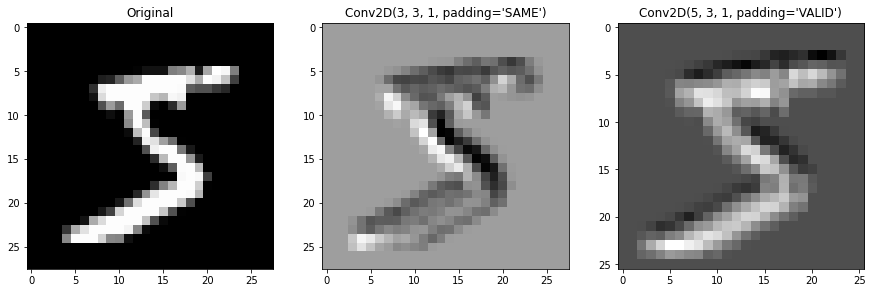

In [27]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(1, 3, 2)
plt.title("Conv2D(3, 3, 1, padding='SAME')")
plt.imshow(output[0, :, :, 0], 'gray')
plt.subplot(1, 3, 3)
plt.title("Conv2D(5, 3, 1, padding='VALID')")
plt.imshow(output2[0, :, :, 0], 'gray')
plt.show()

In [28]:
import numpy as np

#### 기존 0 ~ 255 -> -230 ~ 154 로 바뀐 것 확인 가능

In [29]:
np.min(image), np.max(image)

(0.0, 255.0)

In [30]:
np.min(output), np.max(output)

(-230.65381, 154.00809)

In [31]:
np.min(output2), np.max(output2)

(-216.202, 261.01672)

### weight 불러오기
- layer.get_weights() : list형태로 return해줌
- len(weight) == 2
- y = Wx + b
- weight[0] : weight ( W )
- weight[1] : bias ( b )

In [32]:
weight = layer.get_weights()
weight

[array([[[[-0.36709297, -0.23786119, -0.04663584]],
 
         [[ 0.05236092,  0.28045094,  0.09123346]],
 
         [[ 0.3596545 , -0.34153345,  0.2714132 ]]],
 
 
        [[[-0.11416614, -0.27504188, -0.2008185 ]],
 
         [[-0.07592791,  0.34501976, -0.03259853]],
 
         [[ 0.28227216, -0.25305045,  0.04381451]]],
 
 
        [[[-0.07209373, -0.29703325, -0.36930284]],
 
         [[-0.24530937,  0.39643645,  0.22499925]],
 
         [[-0.2918314 ,  0.2627592 , -0.2211649 ]]]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [33]:
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

output에서 나온 값들을 histogram으로 확인 (x축 -2 ~ 2, y축 0 ~ 100)

filter의 생김새

filter를 거친 이미지의 모습

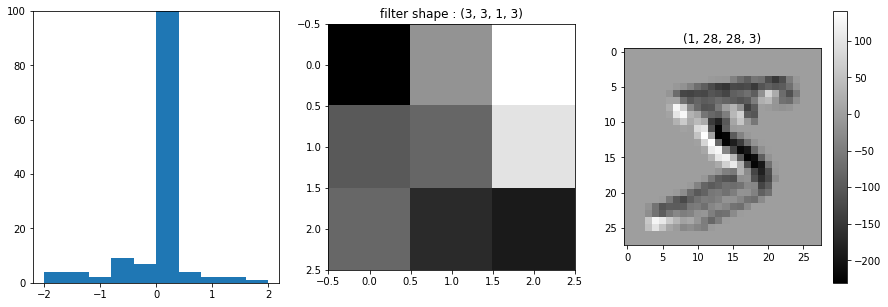

In [46]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(1, 3, 2)
plt.imshow(weight[0][:, :, 0, 0], 'gray')
plt.title("filter shape : " + str(weight[0].shape))
plt.subplot(1, 3, 3)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()

---

## Activation Function

In [47]:
np.min(output), np.max(output)

(-230.65381, 154.00809)

#### ReLU : shape은 그대로 유지하고 0 이하의 값들은 사용하지 않음
- tf.keras.layers.ReLU()

In [48]:
tf.keras.layers.ReLU()

In [49]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [50]:
act_output.shape, output.shape

(TensorShape([1, 28, 28, 3]), TensorShape([1, 28, 28, 3]))

In [51]:
np.min(act_output), np.max(act_output)

(0.0, 154.00809)

ReLU Layer를 통과함으로서 0이하의 값들이 사라진 것을 볼 수 있음

(0.0, 100.0)

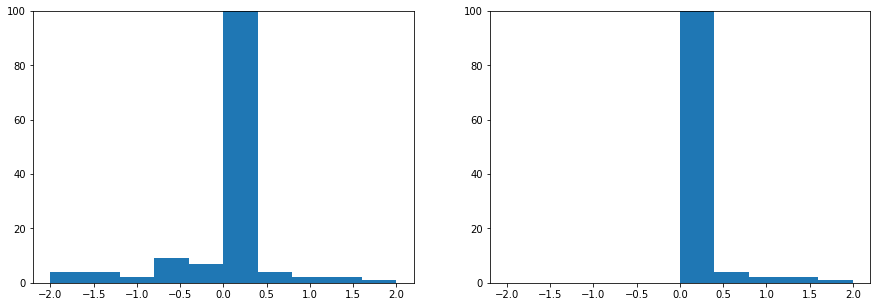

In [56]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(1, 2, 2)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

0 이상의 숫자들만 남기고 다 삭제함

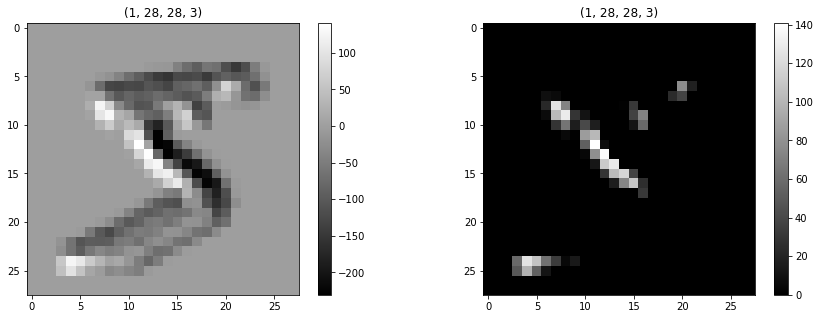

In [59]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.colorbar()

---

### Pooling : 압축

- MaxPooling : tf.keras.layers.MaxPool2D : 확인하는 값들 중 가장 큰 값만 살림
- strides : 확인할 가로 세로 크기

In [60]:
tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [61]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
pool_output = pool_layer(act_output)

기존에 28, 28 였던 사이즈가 14, 14 로 줄어든 것을 볼 수 있음

In [62]:
act_output.shape, pool_output.shape

(TensorShape([1, 28, 28, 3]), TensorShape([1, 14, 14, 3]))

(0.0, 100.0)

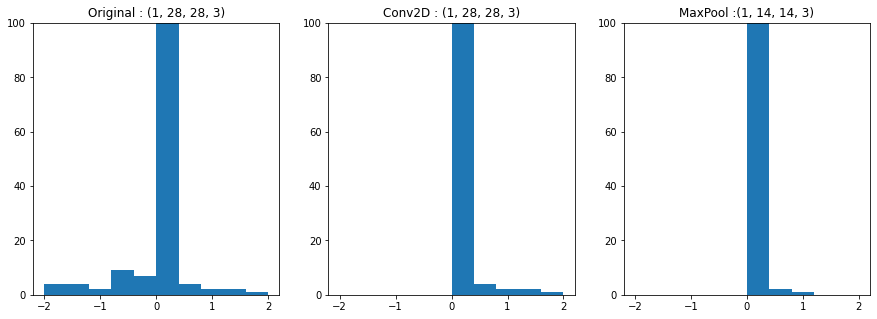

In [66]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original : " + str(output.shape))
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(1, 3, 2)
plt.title("Conv2D : " + str(act_output.shape))
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(1, 3, 3)
plt.title("MaxPool :" + str(pool_output.shape))
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

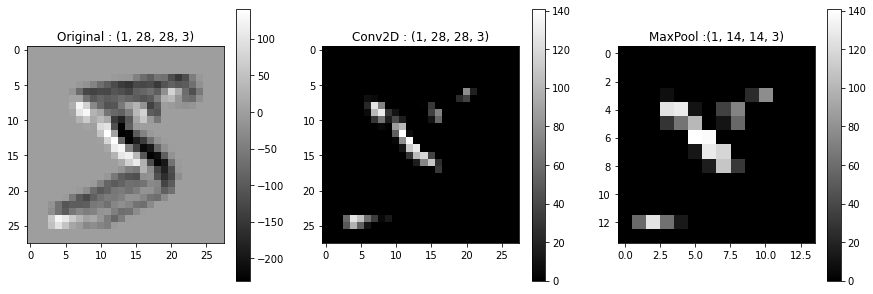

In [67]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original : " + str(output.shape))
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("Conv2D : " + str(act_output.shape))
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("MaxPool :" + str(pool_output.shape))
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()